In [177]:
#import matplotlib
%matplotlib widget
import seaborn as sns
import matplotlib.pyplot as plt
#import ipympl

In [178]:
import agent_based_model as abm 
import importlib

In [179]:
sns.reset_defaults()
#sns.set_context('notebook')
sns.set_theme(palette='viridis')
sns.set_context('talk')
sns.set_style('whitegrid')

# debug here

In [180]:
if False:
    import json
    aparameters = { 
        'param': {'akey':123}
    }
    aparameters['param'] = json.dumps(aparameters['param'])
    aparameters['param'] = json.loads(aparameters['param'])
    # GUH stuck on 
    # AttributeError: 'str' object has no attribute 'read' 
    # bc i used load instead of loads. This library naming continues to be awful

In [181]:
importlib.reload(abm)
_,_,results = abm.run_custom_exp(viz=False)
#results = abm.run_default_model(viz=False)


created sample;  Sample of 3 parameter combinations
~---- treying to create exp
created exp;  <agentpy.experiment.Experiment object at 0x29fd78760>
Scheduled runs: 1
{'normal': 1000, 'suspicious': 100}
Completed: 1, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:00.596815
ran exp;  DataDict {
'info': Dictionary with 12 keys
'parameters': 
    'constants': Dictionary with 12 keys
'reporters': DataFrame with 1 variable and 1 row
}


In [182]:
#display(results)
#display(results.info)
#results.reporters
results.info['time_stamp'][:19]

'2022-12-13 20:17:37'

In [183]:
results

DataDict {
'info': Dictionary with 12 keys
'parameters': 
    'constants': Dictionary with 12 keys
'reporters': DataFrame with 1 variable and 1 row
}

# fig 1

## fig 1 is just of the means shifted distirubtion

In [199]:
fig, ax = plt.subplots(2,1)



!-- param changes {'mean_txn_hrs': {'normal': 12, 'suspicious': 22}}
mean_txn_hrs: modifying frozendict.frozendict({'normal': 14, 'suspicious': 22})->{'normal': 12, 'suspicious': 22}
{'normal': 1000, 'suspicious': 20}
Completed: 96 steps
Run time: 0:00:00.668738
Simulation finished
Data saved to ap_output/BankModel_89


!-- param changes {'mean_txn_hrs': {'normal': 17, 'suspicious': 22}}
mean_txn_hrs: modifying frozendict.frozendict({'normal': 14, 'suspicious': 22})->{'normal': 17, 'suspicious': 22}
{'normal': 1000, 'suspicious': 20}
Completed: 96 steps
Run time: 0:00:00.638859
Simulation finished


/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:536: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 40)
/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:536: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 40)


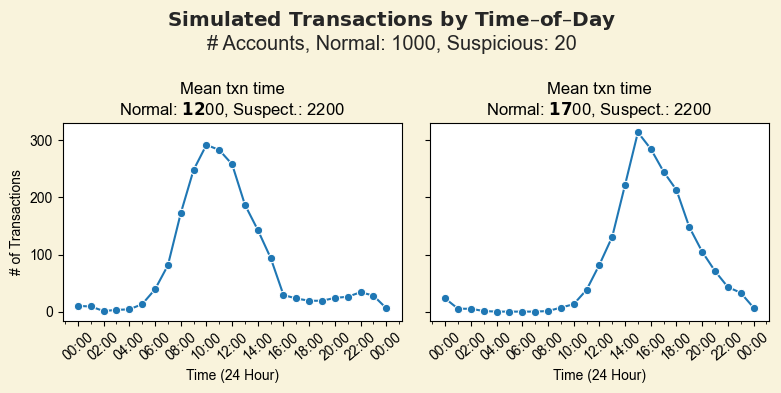

In [200]:
importlib.reload(abm)
abm.BankExpsCollection.gen_fig_1()

In [188]:
# 

In [135]:
!mkdir results

mkdir: results: File exists


In [142]:
# fig 2 is of the varying # suspicious
importlib.reload(abm)
_,_,results = abm.BankExpsCollection.run_experiment()
#results = abm.run_default_model(viz=False)

created sample;  Sample of 3 parameter combinations
created exp;  <agentpy.experiment.Experiment object at 0x29e68bc70>
Scheduled runs: 1
{'normal': 1000, 'suspicious': 100}
Completed: 1, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:01.099437
ran exp;  DataDict {
'info': Dictionary with 12 keys
'parameters': 
    'constants': Dictionary with 12 keys
'reporters': DataFrame with 1 variable and 1 row
}


In [48]:
import pandas as pd
afoo = {'asbc': {1: 123}}
bfoo = pd.DataFrame()
afoo.unique()

AttributeError: 'dict' object has no attribute 'unique'


    121 for col in df.columns:
    122     s = df[col]
--> 123     if len(s.unique()) == 1:
    124         fixed_pars[s.name] = df[col][0]
    125         df.drop(col, inplace=True, axis=1)

File ~/v3/lib/python3.10/site-packages/pandas/core/series


File ~/v3/lib/python3.10/site-packages/pandas/core/series.py:2088, in Series.unique(self)
   2030 def unique(self) -> ArrayLike:
   2031     """
   2032     Return unique values of Series object.
   2033 
   (...)
   2086     Categories (3, object): ['a' < 'b' < 'c']
   2087     """

In [8]:
!cat agent_based_model.py | grep parameters_multi

    #parameters_multi['percent_sus'] = ap.Values(10, 1, 0.1)


# other

In [170]:
import agentpy as ap

In [171]:
NUM_AGENTS_PER_TYPE = {
    'normal': 1000,
    # 'suspicious': 10, 
}

# these are send, rcv pairs 
AGENT_TYPE_PAIR_PROBS = {
    'normal': {
        'self': 0.9,
        'suspicious': 0.1 },
    'suspicious': {
        'self': 0.7,
        'normal': 0.3
    } }

MEAN_TXN_HRS = {'normal': 14,
                'suspicious': 22}

MEAN_TXN_AMOUNTS = {'normal': 250,
                    'suspicious': 50}  # this shoudl actually vary...

MEAN_NUM_TXNS = { 'normal': 4, 
                    'suspicious': 10 }
MINS_PER_STEP = 15

parameters = {
    'mean_num_txns': MEAN_NUM_TXNS,
    'mean_txn_amounts': MEAN_TXN_AMOUNTS,
    'num_agents_per_type': NUM_AGENTS_PER_TYPE,
    'agent_type_pair_probs': AGENT_TYPE_PAIR_PROBS,
    'mean_txn_hrs': MEAN_TXN_HRS,
    'mean_txn_amounts ': MEAN_TXN_AMOUNTS,
    'mean_txns': 4,  # avg num txns each agent makes
    'starting_balance': 100,
    'seed': 42,
    'mins_per_step': MINS_PER_STEP,  # 1 hr
    'steps': int(24 * (60/MINS_PER_STEP)),  # 24 hours * steps per hr
# hardcode, since can't give combo of options between the two
    'percent_sus': 1/100,
}
# --- NOTE: Setting experiment here! 
parameters_multi = dict(parameters)
parameters_multi.update({
    'percent_sus': ap.Values(10, 1, 0.1),
    })
print('parameters sweep; ', parameters_multi, 'value ', parameters['percent_sus'])

sample = ap.Sample(parameters_multi) # grid search, each repeat 1x
print('created sample; ', sample)

parameters sweep;  {'mean_num_txns': {'normal': 4, 'suspicious': 10}, 'mean_txn_amounts': {'normal': 250, 'suspicious': 50}, 'num_agents_per_type': {'normal': 1000}, 'agent_type_pair_probs': {'normal': {'self': 0.9, 'suspicious': 0.1}, 'suspicious': {'self': 0.7, 'normal': 0.3}}, 'mean_txn_hrs': {'normal': 14, 'suspicious': 22}, 'mean_txn_amounts ': {'normal': 250, 'suspicious': 50}, 'mean_txns': 4, 'starting_balance': 100, 'seed': 42, 'mins_per_step': 15, 'steps': 96, 'percent_sus': Set of 3 parameter values} value  0.01
created sample;  Sample of 3 parameter combinations


In [172]:
sample

Sample of 3 parameter combinations

In [173]:
exp = ap.Experiment(abm.BankModel, sample, iterations=1)
print('created exp; ', exp)
#return exp
results = exp.run()
print('ran exp; ', results)
#results.save()


TypeError: unhashable type: 'dict'

In [ ]:
fig, model, results = abm.run_exp(viz=True)
plt.tight_layout()
plt.show()

In [ ]:
#   